In [33]:
# followed https://github.com/mdbloice/Augmentor/blob/master/notebooks/Multiple-Mask-Augmentation.ipynb 
####

In [34]:
# Some imports we will need for this notebook
import Augmentor
import numpy as np
from PIL import Image
import glob
from natsort import natsorted
import os
import random
import requests
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [35]:
#'E:\\Uni\\MasterThesis\\Data\\trainAnnotate\\'

In [50]:
# Reading and sorting the image paths from the directories
ground_truth_images = natsorted(glob.glob("E:/Uni/MasterThesis/Data/trainData/*.png"))
segmentation_mask_images = natsorted(glob.glob("E:/Uni/MasterThesis/Data/trainAnnotate/*.png"))

#needed to save the images
trainData_path="E:/Uni/MasterThesis/Data/trainData/output/"
trainAnno_path='E:/Uni/MasterThesis/Data/trainAnnotate/output/'


In [51]:
for i in range(0, len(ground_truth_images)):
    print("%s: Ground: %s | Mask 1: %s" % 
          (i+1, os.path.basename(ground_truth_images[i]),
           os.path.basename(segmentation_mask_images[i])))

1: Ground: tile_0067.png | Mask 1: tile_0067.png
2: Ground: tile_0069.png | Mask 1: tile_0069.png
3: Ground: tile_0103.png | Mask 1: tile_0103.png
4: Ground: tile_0114.png | Mask 1: tile_0114.png
5: Ground: tile_0121.png | Mask 1: tile_0121.png
6: Ground: tile_0146.png | Mask 1: tile_0146.png
7: Ground: tile_0153.png | Mask 1: tile_0153.png
8: Ground: tile_0156.png | Mask 1: tile_0156.png
9: Ground: tile_0164.png | Mask 1: tile_0164.png
10: Ground: tile_0166.png | Mask 1: tile_0166.png
11: Ground: tile_0167.png | Mask 1: tile_0167.png
12: Ground: tile_0172.png | Mask 1: tile_0172.png
13: Ground: tile_0200.png | Mask 1: tile_0200.png
14: Ground: tile_0215.png | Mask 1: tile_0215.png
15: Ground: tile_0239.png | Mask 1: tile_0239.png
16: Ground: tile_0254.png | Mask 1: tile_0254.png
17: Ground: tile_0260.png | Mask 1: tile_0260.png
18: Ground: tile_0263.png | Mask 1: tile_0263.png
19: Ground: tile_0325.png | Mask 1: tile_0325.png
20: Ground: tile_0341.png | Mask 1: tile_0341.png
21: Groun

In [52]:
rgb = []
gray= []
for i in range(0,len(segmentation_mask_images)-1):
    image = cv2.imread(segmentation_mask_images[i])
    gray.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    rgb_image = cv2.imread(ground_truth_images[i])
    rgb.append(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
#print(gray)
#checking pixel values
t = gray[7]
n = t.reshape(1, -1).squeeze()
#n = to_np(a)
u = []
for i in n:
  if i not in u:
    u.append(i)
print(sorted(u))
len(u)

[80, 127, 149, 196, 255]


5

In [53]:
#make zip for reading image files
collated_images_and_masks = list(zip(rgb, 
                                     gray))
#collated_images_and_masks

In [54]:
images = [[y for y in x] for x in collated_images_and_masks]
#images[3][1]

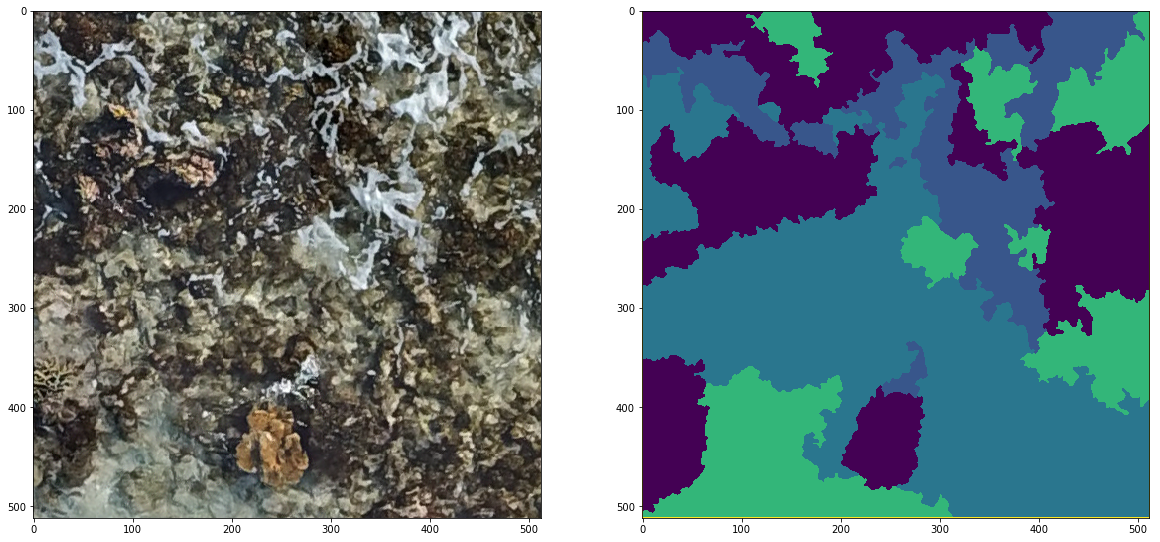

In [55]:
#view images with PIL
r_index = random.randint(0, len(images)-1)
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(images[r_index][0])
axarr[1].imshow(images[r_index][1]);
#print(images[r_index][1])

In [56]:
#checking pixel values
t = gray[r_index]
n = t.reshape(1, -1).squeeze()
#n = to_np(a)
u = []
for i in n:
  if i not in u:
    u.append(i)
print(sorted(u))
len(u)

[80, 127, 149, 196, 255]


5

In [57]:
#load data in the augmentor structure
p = Augmentor.DataPipeline(images)

In [58]:
#do data augmentation

#these functions make more mask pixel values
#p.rotate(probability=1, max_left_rotation=10, max_right_rotation=10)
#p.skew(probability=0.6, magnitude=0.3)
#p.invert(probability=0.4)
#p.zoom_random(probability=0.5, percentage_area=0.3)

#these functions work
p.flip_left_right(probability=0.5)
p.rotate90(probability=0.5)
p.rotate180(probability=0.5)
p.flip_top_bottom(probability=0.5)
augmented_images = p.sample(130) #number of output images

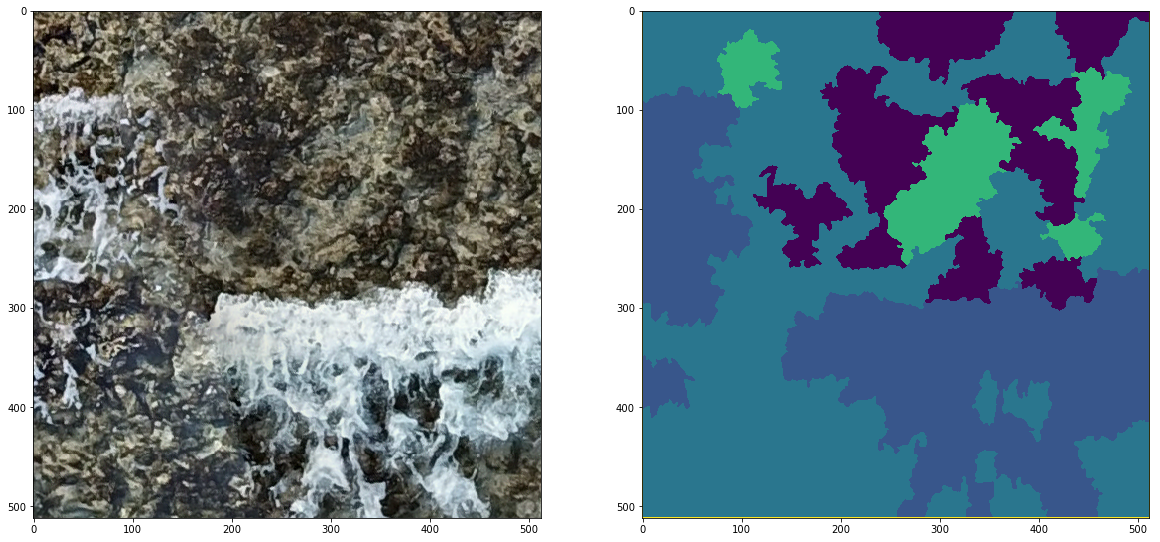

In [59]:
#viewing random images with mask
r_index = random.randint(0, len(augmented_images)-1)
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(augmented_images[r_index][0])
axarr[1].imshow(augmented_images[r_index][1]);

In [60]:
#checking pixel values after augmentation
t = augmented_images[r_index][1]
n = t.reshape(1, -1).squeeze()
#n = to_np(a)
u = []
for i in n:
  if i not in u:
    u.append(i)
print(sorted(u))
len(u)

[80, 127, 149, 196, 255]


5

In [47]:
#str(i+1)

'256'

In [61]:
#saving images
for i in range(0,len(augmented_images)):
    img=Image.fromarray((augmented_images[i][0]))
    img=img.save(trainData_path+ "augmented_"+ str(i+1) +'.png')
    img1=Image.fromarray((augmented_images[i][1]))
    img1=img1.save(trainAnno_path + "augmented_" + str(i+1) + '.png')
    
#print(len(augmented_images))    
print("saved augmented figures")

saved augmented figures


In [49]:
#print(augmented_images[1][1])